# 1.0 Risk Fundamentals

## Investment Practice - Risk Management Series

**Learning Objectives:**
- Understand fundamental risk concepts in finance
- Distinguish between systematic and unsystematic risk
- Calculate basic risk measures (volatility, variance, standard deviation)
- Apply risk concepts to real market data using Python
- Build foundation for advanced risk management techniques

**Prerequisites:**
- Basic Python programming
- Understanding of financial markets
- Familiarity with pandas and numpy

---

## Setup and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import os
from scipy import stats
warnings.filterwarnings('ignore')

# Configure plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
sns.set_palette("husl")

print("📊 Risk Fundamentals - Setup Complete")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")

# Check if real data is available
stock_prices_file = 'stock_prices.csv'
stock_returns_file = 'stock_returns.csv'

if not (os.path.exists(stock_prices_file) and os.path.exists(stock_returns_file)):
    print("⚠️  Real data not found. Please run download_data.py first to get real market data.")
    print("   For now, using synthetic data for demonstration.")
    USE_REAL_DATA = False
else:
    USE_REAL_DATA = True
    print("✅ Real market data detected - using actual financial data")

📊 Risk Fundamentals - Setup Complete
📅 Analysis Date: 2025-11-17
✅ Real market data detected - using actual financial data


In [12]:

# Load real market data
print("🔄 Loading real market data...")

# Load stock prices and returns (includes SPY)
prices = pd.read_csv('stock_prices.csv', index_col=0, parse_dates=True)
returns = pd.read_csv('stock_returns.csv', index_col=0, parse_dates=True)

# Select a diverse portfolio across sectors for analysis
stocks = ['AAPL', 'JPM', 'JNJ', 'WMT', 'SPY']  # Tech, Financials, Healthcare, Consumer Staples, Market Index
prices = prices[stocks]
returns = returns[stocks]

# Display basic info
# print(prices.head().to_string())
prices.head()

🔄 Loading real market data...


,AAPL,JPM,JNJ,WMT,SPY
Date,,,,,
2020-09-08 00:00:00-04:00,109.742035,87.373016,127.685051,43.048664,NaN
2020-09-09 00:00:00-04:00,114.119247,88.203712,129.800720,43.496407,NaN
2020-09-10 00:00:00-04:00,110.393730,87.294312,127.381615,42.538731,NaN
2020-09-11 00:00:00-04:00,108.944412,88.378601,128.135941,42.504528,311.049347
2020-09-14 00:00:00-04:00,112.212723,89.602814,128.630127,42.697304,315.146271


---

## 1. What is Financial Risk?

**Financial Risk** is the possibility that an investment's actual returns will differ from expected returns. Risk is inherent in all investments and cannot be eliminated, but it can be measured, managed, and controlled.

### Mathematical Foundation: Risk and Return Metrics

Before we implement risk calculations, let's establish the mathematical framework:

#### Expected Return
$$E[R] = \frac{1}{n} \sum_{i=1}^{n} R_i$$

Where:
- $E[R]$ = Expected return
- $R_i$ = Return in period $i$
- $n$ = Number of observations

#### Risk (Volatility) Measurement
**Variance:**
$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (R_i - E[R])^2$$

**Standard Deviation (Volatility):**
$$\sigma = \sqrt{\sigma^2}$$

**Annualized Volatility:**
$$\sigma_{annual} = \sigma_{daily} \times \sqrt{T}$$

Where:
- $\sigma^2$ = Variance
- $\sigma$ = Standard deviation (volatility)
- $T$ = Number of trading periods per year (typically 252 for daily data)

#### Risk-Return Relationship
The fundamental principle that higher expected returns require accepting higher risk:
$$E[R_i] = R_f + \text{Risk Premium}_i$$

Where:
- $R_f$ = Risk-free rate
- Risk Premium increases with volatility $\sigma_i$

### Key Risk Concepts:

1. **Risk vs. Uncertainty**
   - **Risk**: Measurable, quantifiable variability using $\sigma$
   - **Uncertainty**: Unknown and unmeasurable outcomes

2. **Risk-Return Tradeoff**
   - Higher expected returns typically require accepting higher risk
   - Mathematically expressed as positive correlation between $E[R]$ and $\sigma$

3. **Risk Perception**
   - Risk tolerance varies among investors
   - Behavioral factors influence risk perception

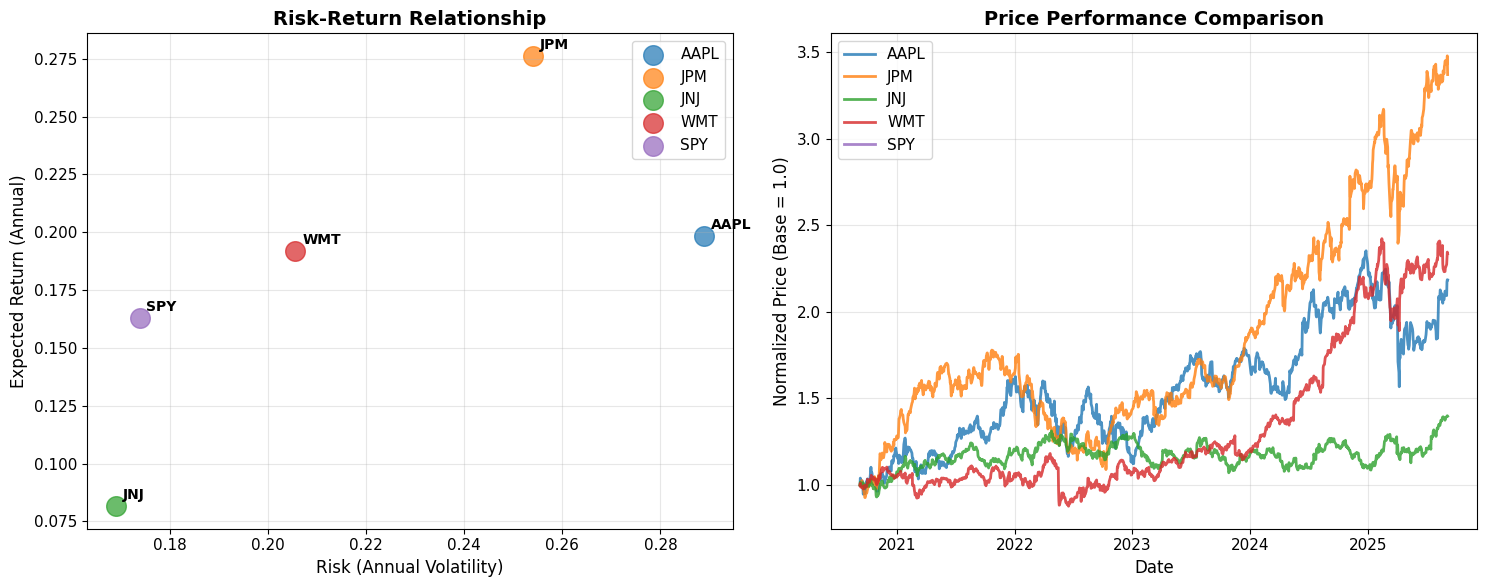

💡 Key Observations:
• Higher volatility stocks show wider price swings
• Risk-return relationship is generally positive
• Different securities have different risk characteristics


In [3]:
# Visualize the risk-return relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calculate annual risk and return metrics
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# Plot 1: Risk-Return Scatter
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Added 5th color for SPY
for i, stock in enumerate(stocks):
    ax1.scatter(annual_volatility[stock], annual_returns[stock], 
               s=200, alpha=0.7, color=colors[i], label=stock)
    
    # Add labels
    ax1.annotate(stock, 
                (annual_volatility[stock], annual_returns[stock]),
                xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

ax1.set_xlabel('Risk (Annual Volatility)', fontsize=12)
ax1.set_ylabel('Expected Return (Annual)', fontsize=12)
ax1.set_title('Risk-Return Relationship', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Price movements over time
for i, stock in enumerate(stocks):
    normalized_prices = prices[stock] / prices[stock].iloc[0]
    ax2.plot(prices.index, normalized_prices, 
             linewidth=2, label=stock, color=colors[i], alpha=0.8)

ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Normalized Price (Base = 1.0)', fontsize=12)
ax2.set_title('Price Performance Comparison', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Key Observations:")
print(f"• Higher volatility stocks show wider price swings")
print(f"• Risk-return relationship is generally positive")
print(f"• Different securities have different risk characteristics")

---

## 2. Types of Financial Risk

Financial risks can be categorized in several ways. Understanding these categories helps in developing appropriate risk management strategies.

### Mathematical Framework: Risk Decomposition

#### A. Systematic vs. Unsystematic Risk

**Total Risk Decomposition:**
$$\sigma_i^2 = \sigma_{systematic,i}^2 + \sigma_{unsystematic,i}^2$$

**Systematic Risk (Market Risk):**
$$\sigma_{systematic,i}^2 = \beta_i^2 \times \sigma_m^2$$

**Beta (Market Sensitivity):**
$$\beta_i = \frac{Cov(R_i, R_m)}{Var(R_m)} = \frac{\sigma_{i,m}}{\sigma_m^2}$$

**Correlation with Market:**
$$\rho_{i,m} = \frac{Cov(R_i, R_m)}{\sigma_i \times \sigma_m}$$

**Unsystematic Risk:**
$$\sigma_{unsystematic,i}^2 = \sigma_i^2 - \beta_i^2 \times \sigma_m^2$$

Where:
- $\sigma_i^2$ = Total variance of security $i$
- $\beta_i$ = Beta (systematic risk measure) of security $i$
- $\sigma_m^2$ = Market variance
- $\rho_{i,m}$ = Correlation between security $i$ and market
- $Cov(R_i, R_m)$ = Covariance between security and market returns

#### Risk Classification:

**Systematic Risk (Market Risk)**
- Affects the entire market or large segments ($\beta_i \neq 0$)
- Cannot be diversified away
- Examples: Interest rate changes, inflation, recession
- Measured by Beta ($\beta_i$)

**Unsystematic Risk (Specific Risk)**
- Affects individual securities or sectors
- Can be reduced through diversification
- Examples: Company earnings, management changes, industry events
- Also called idiosyncratic or diversifiable risk
- Represents the residual risk after accounting for market movements

#### B. Other Risk Classifications

Beyond systematic and unsystematic risk, investors face several other important risk categories:

**1. Credit Risk (Default Risk)**
   - **Definition**: The risk that a borrower will fail to meet debt obligations
   - **Impact**: Bond defaults, loan losses, counterparty failures
   - **Measurement**: Credit ratings, default probabilities, credit spreads
   - **Mathematical Representation**: 
   $$P(Default) = f(\text{Credit Rating, Financial Ratios})$$

**2. Liquidity Risk**
   - **Definition**: The risk of being unable to buy or sell an asset quickly without significantly affecting its price
   - **Impact**: Wider bid-ask spreads, price slippage, inability to exit positions
   - **Measurement**: Trading volume, bid-ask spreads, market depth
   - **Mathematical Representation**: 
   $$\text{Bid-Ask Spread} = \frac{P_{ask} - P_{bid}}{P_{mid}}$$

**3. Operational Risk**
   - **Definition**: The risk of loss from inadequate or failed internal processes, people, systems, or external events
   - **Impact**: System failures, fraud, human errors, business disruption
   - **Measurement**: Loss frequency and severity analysis, scenario analysis


**4. Regulatory Risk (Political Risk)**
   - **Definition**: The risk that changes in laws, regulations, or government policies will adversely affect investments
   - **Impact**: New tax laws, industry regulations, trade policies, sanctions
   - **Measurement**: Policy change probability, impact assessment


**5. Currency Risk (Foreign Exchange Risk)**
   - **Definition**: The risk of losses due to fluctuations in foreign exchange rates
   - **Impact**: Changes in value of foreign investments when converted to home currency
   - **Relevant for**: International investments, multinational corporations
   
**6. Interest Rate Risk**
   - **Definition**: The risk that changes in interest rates will negatively affect investment values
   - **Impact**: Bond prices fall when rates rise; affects fixed-income securities
   - **Measurement**: Duration, convexity

**7. Inflation Risk (Purchasing Power Risk)**
   - **Definition**: The risk that inflation will erode the real value of returns
   - **Impact**: Reduced purchasing power of investment returns
   - **Particularly affects**: Fixed-income securities, cash holdings

### Portfolio Risk Diversification Benefits

For a portfolio of $n$ assets:
$$\sigma_p^2 = \sum_{i=1}^{n} w_i^2 \sigma_i^2 + \sum_{i=1}^{n} \sum_{j \neq i}^{n} w_i w_j \sigma_{ij}$$

Where:
- $w_i$ = Weight of asset $i$ in portfolio
- $\sigma_{ij}$ = Covariance between assets $i$ and $j$

**Key insight**: Diversification reduces unsystematic risk but cannot eliminate systematic risk.

In [8]:
# Demonstrate systematic vs unsystematic risk
# Using SPY as market proxy to measure systematic risk

market_returns = returns['SPY']
risk_decomposition = {}

# Select individual stocks (excluding SPY for analysis)
individual_stocks = [stock for stock in stocks if stock != 'SPY']

for stock in individual_stocks:
    stock_returns = returns[stock]
    
    # Calculate correlation with market
    correlation = stock_returns.corr(market_returns)
    
    # Simple beta calculation (will be covered more in later lectures)
    covariance = stock_returns.cov(market_returns)
    market_variance = market_returns.var()
    beta = covariance / market_variance
    
    # Risk decomposition
    total_variance = stock_returns.var()
    systematic_variance = (beta ** 2) * market_variance
    unsystematic_variance = total_variance - systematic_variance
    
    risk_decomposition[stock] = {
        'Total Risk': np.sqrt(total_variance) * np.sqrt(252),
        'Systematic Risk': np.sqrt(systematic_variance) * np.sqrt(252),
        'Unsystematic Risk': np.sqrt(unsystematic_variance) * np.sqrt(252),
        'Beta': beta,
        'Correlation': correlation,
        'Systematic %': systematic_variance / total_variance * 100,
        'Unsystematic %': unsystematic_variance / total_variance * 100
    }

# Create summary table
risk_df = pd.DataFrame(risk_decomposition).T
print("📊 Risk Decomposition Analysis:")
print(risk_df.round(4).to_string())



📊 Risk Decomposition Analysis:
      Total Risk  Systematic Risk  Unsystematic Risk    Beta  Correlation  Systematic %  Unsystematic %
AAPL      0.2888           0.2191             0.1881  1.2604       0.7605       57.5762         42.4238
JPM       0.2541           0.1561             0.2004  0.8980       0.6141       37.7668         62.2332
JNJ       0.1691           0.0423             0.1637  0.2434       0.2505        6.2632         93.7368
WMT       0.2056           0.0829             0.1881  0.4770       0.4035       16.2749         83.7251


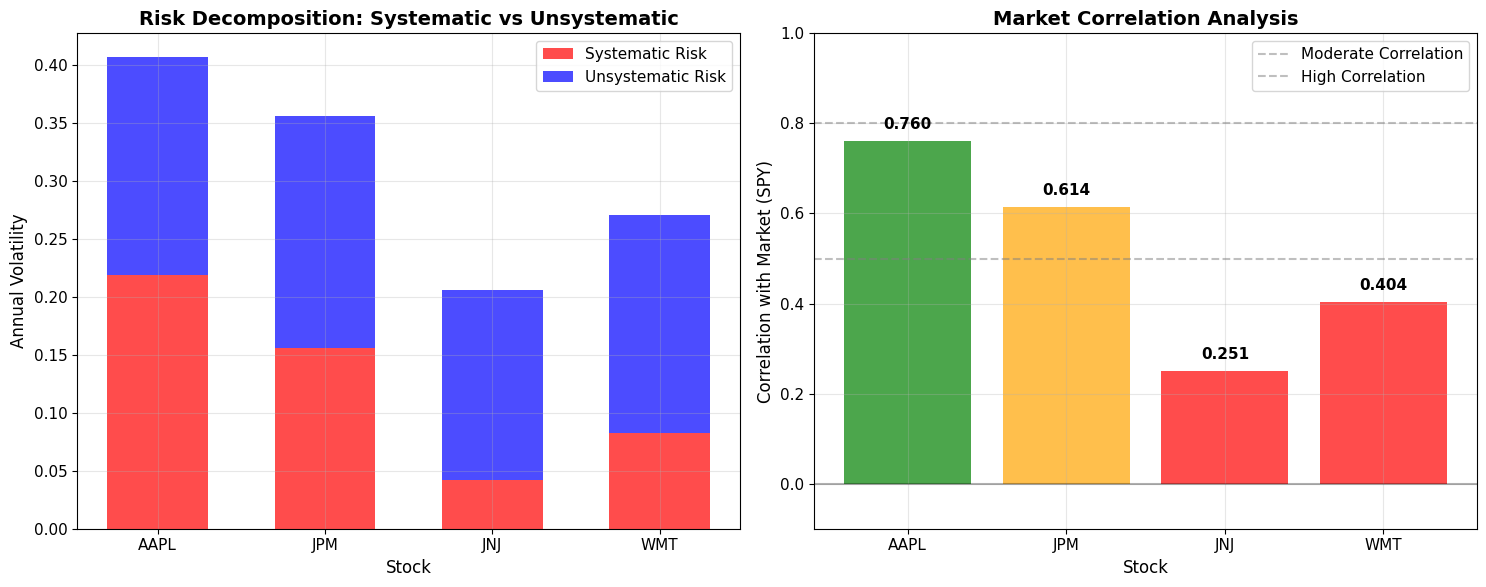


💡 Risk Decomposition Insights:
• AAPL: 57.6% systematic, 42.4% unsystematic risk
• JPM: 37.8% systematic, 62.2% unsystematic risk
• JNJ: 6.3% systematic, 93.7% unsystematic risk
• WMT: 16.3% systematic, 83.7% unsystematic risk


In [5]:
# Visualize risk decomposition
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Risk components stacked bar chart
systematic_risk = [risk_decomposition[s]['Systematic Risk'] for s in individual_stocks]
unsystematic_risk = [risk_decomposition[s]['Unsystematic Risk'] for s in individual_stocks]

x = np.arange(len(individual_stocks))
width = 0.6

ax1.bar(x, systematic_risk, width, label='Systematic Risk', 
        color='red', alpha=0.7)
ax1.bar(x, unsystematic_risk, width, bottom=systematic_risk,
        label='Unsystematic Risk', color='blue', alpha=0.7)

ax1.set_xlabel('Stock', fontsize=12)
ax1.set_ylabel('Annual Volatility', fontsize=12)
ax1.set_title('Risk Decomposition: Systematic vs Unsystematic', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(individual_stocks)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Correlation with market
correlations = [risk_decomposition[s]['Correlation'] for s in individual_stocks]
colors_corr = ['green' if c > 0.7 else 'orange' if c > 0.5 else 'red' for c in correlations]

bars = ax2.bar(individual_stocks, correlations, color=colors_corr, alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Moderate Correlation')
ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5, label='High Correlation')

ax2.set_xlabel('Stock', fontsize=12)
ax2.set_ylabel('Correlation with Market (SPY)', fontsize=12)
ax2.set_title('Market Correlation Analysis', fontsize=14, fontweight='bold')
ax2.set_ylim(-0.1, 1.0)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{corr:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Risk Decomposition Insights:")
for stock in individual_stocks:
    sys_pct = risk_decomposition[stock]['Systematic %']
    unsys_pct = risk_decomposition[stock]['Unsystematic %']
    print(f"• {stock}: {sys_pct:.1f}% systematic, {unsys_pct:.1f}% unsystematic risk")

---

## 3. Measuring Risk: Volatility and Standard Deviation

**Volatility** is the most common measure of financial risk. It quantifies the degree of variation in returns over time.

### Mathematical Framework: Volatility Calculations

#### Core Formulas:

**Sample Variance:**
$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (R_i - \bar{R})^2$$

**Standard Deviation (Volatility):**
$$\sigma = \sqrt{\sigma^2}$$

**Time Scaling for Volatility:**
$$\sigma_T = \sigma_1 \times \sqrt{T}$$

#### Period-Specific Volatility:

**Daily to Annual Conversion:**
$$\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$$

**Daily to Monthly Conversion:**
$$\sigma_{monthly} = \sigma_{daily} \times \sqrt{21}$$

**Daily to Weekly Conversion:**
$$\sigma_{weekly} = \sigma_{daily} \times \sqrt{5}$$

#### Additional Risk Metrics:

**Skewness (Asymmetry):**
$$Skew = \frac{E[(R - \mu)^3]}{\sigma^3} = \frac{\frac{1}{n}\sum_{i=1}^{n}(R_i - \bar{R})^3}{\sigma^3}$$

**Kurtosis (Tail Risk):**
$$Kurt = \frac{E[(R - \mu)^4]}{\sigma^4} = \frac{\frac{1}{n}\sum_{i=1}^{n}(R_i - \bar{R})^4}{\sigma^4}$$

**Value at Risk (VaR) - Percentile Method:**
$$VaR_\alpha = \text{Percentile}(R, \alpha)$$

**Sharpe Ratio (Risk-Adjusted Return):**
$$SR = \frac{E[R] - R_f}{\sigma}$$

Where:
- $R_i$ = Return in period $i$
- $\bar{R}$ = Sample mean return
- $n$ = Number of observations
- $T$ = Time scaling factor
- $\mu$ = Population mean
- $\alpha$ = Confidence level (e.g., 5% for 95% VaR)
- $R_f$ = Risk-free rate

#### Key Assumptions:

1. **Independence**: Returns are independent across time periods
2. **Normality**: Returns follow normal distribution (often violated in practice)
3. **Constant Volatility**: Volatility remains constant over time (homoscedasticity)

#### Interpretation:

- **Higher $\sigma$**: Greater price variability and risk
- **Skewness**: Negative skew indicates more frequent large losses
- **Kurtosis > 3**: "Fat tails" - more extreme events than normal distribution
- **VaR**: Maximum expected loss at given confidence level
- **Sharpe Ratio**: Return per unit of risk taken

In [9]:
# Calculate comprehensive volatility metrics
print("📊 VOLATILITY ANALYSIS")
print("=" * 40)

volatility_metrics = {}

for stock in stocks:
    stock_returns = returns[stock]
    
    # Basic volatility calculations
    daily_vol = stock_returns.std()
    monthly_vol = daily_vol * np.sqrt(21)  # ~21 trading days per month
    annual_vol = daily_vol * np.sqrt(252)
    
    # Additional risk metrics
    mean_return = stock_returns.mean()
    skewness = stock_returns.skew()
    kurtosis = stock_returns.kurtosis()
    
    # Value at Risk (simple percentile method)
    var_95 = np.percentile(stock_returns, 5)  # 5th percentile for 95% VaR
    var_99 = np.percentile(stock_returns, 1)  # 1st percentile for 99% VaR
    
    volatility_metrics[stock] = {
        'Daily Vol': daily_vol,
        'Monthly Vol': monthly_vol,
        'Annual Vol': annual_vol,
        'Mean Return': mean_return * 252,  # Annualized
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'VaR 95%': var_95,
        'VaR 99%': var_99
    }

# Create comprehensive metrics table
vol_df = pd.DataFrame(volatility_metrics).T
print("Volatility Metrics Summary:")
print(vol_df.round(4).to_string())

📊 VOLATILITY ANALYSIS
Volatility Metrics Summary:
      Daily Vol  Monthly Vol  Annual Vol  Mean Return  Skewness  Kurtosis  VaR 95%  VaR 99%
AAPL     0.0182       0.0834      0.2888       0.1985    0.4197    5.6691  -0.0296  -0.0466
JPM      0.0160       0.0733      0.2541       0.2763    0.6217    7.8721  -0.0240  -0.0418
JNJ      0.0107       0.0488      0.1691       0.0815    0.0130    4.8931  -0.0161  -0.0272
WMT      0.0130       0.0593      0.2056       0.1917   -0.6663   12.0681  -0.0188  -0.0310
SPY      0.0110       0.0502      0.1739       0.1627    0.2722    8.5370      NaN      NaN


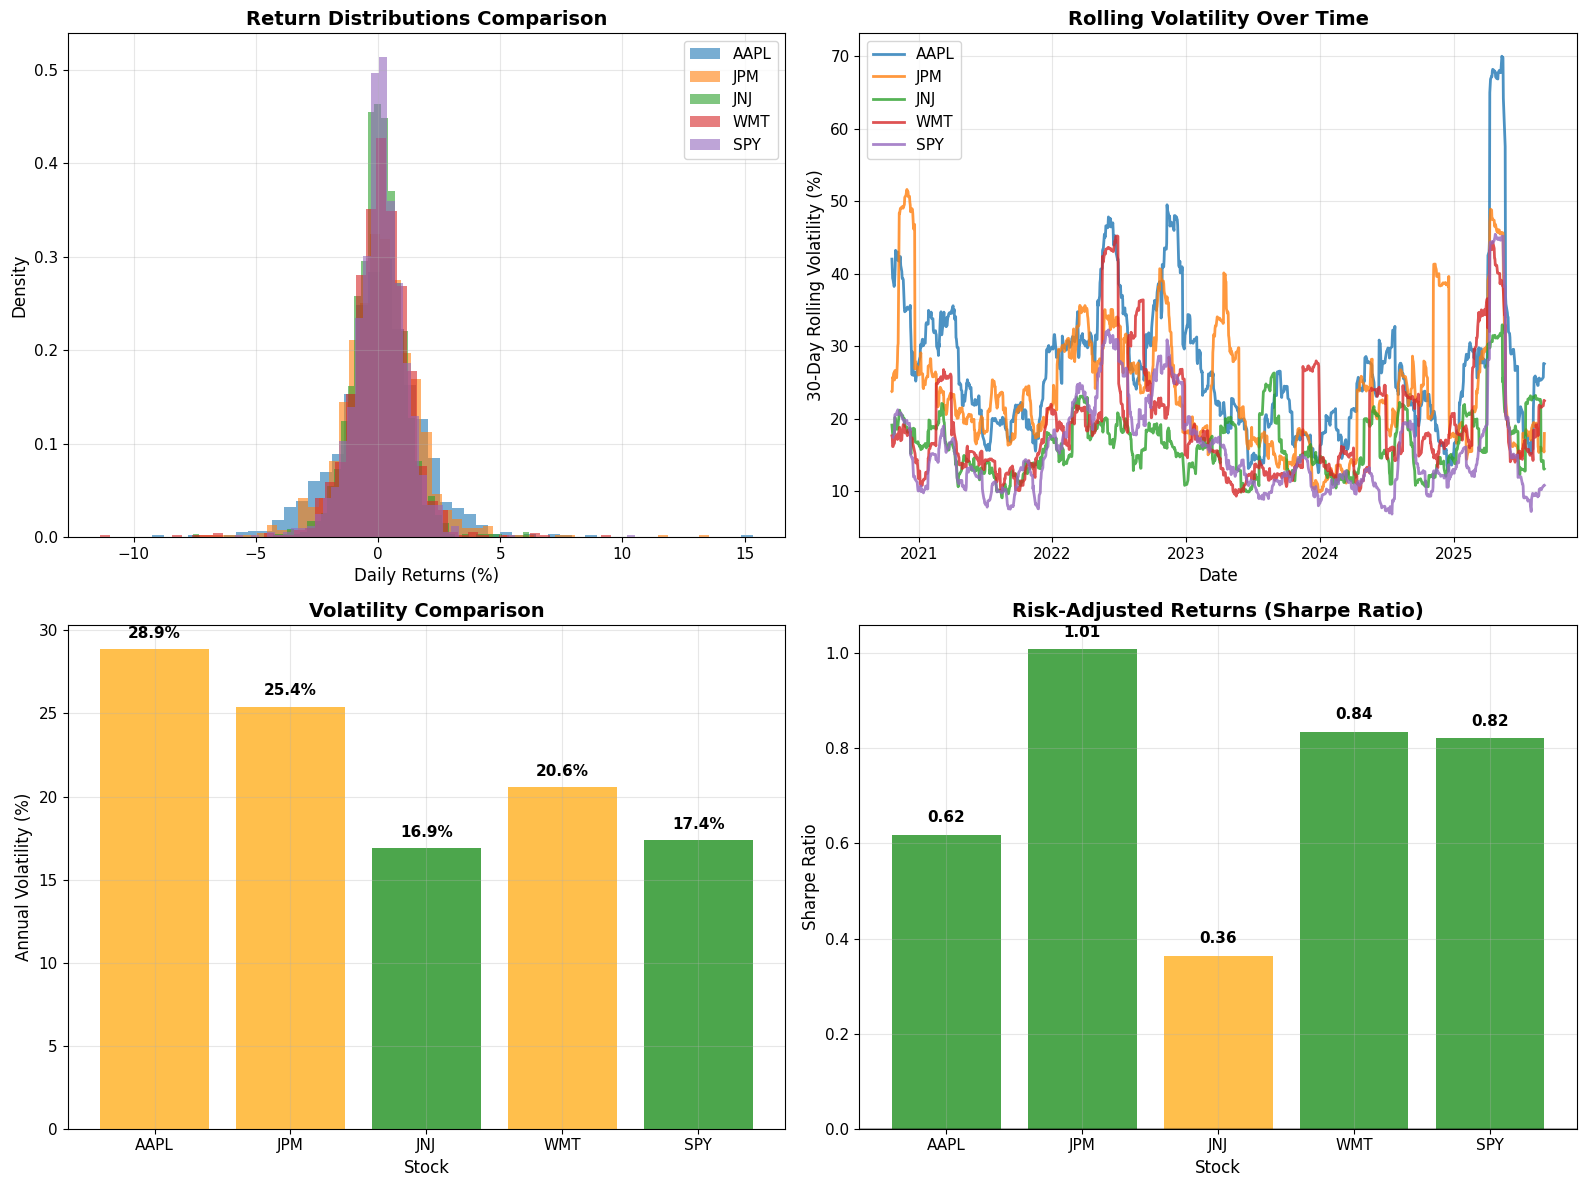


💡 Volatility Analysis Insights:
• Highest volatility: AAPL (28.9%)
• Lowest volatility: JNJ (16.9%)
• Best risk-adjusted return: JPM (Sharpe: 1.01)
• Volatility varies significantly over time for all securities


In [7]:
# Visualize volatility patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Return distributions
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Ensure we have 5 colors
for i, stock in enumerate(stocks):
    ax1.hist(returns[stock] * 100, bins=50, alpha=0.6, 
             label=stock, density=True, color=colors[i])

ax1.set_xlabel('Daily Returns (%)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Return Distributions Comparison', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Rolling volatility (30-day) - Fix alignment issue
for i, stock in enumerate(stocks):
    rolling_vol = returns[stock].rolling(window=30).std() * np.sqrt(252) * 100
    # Use the rolling volatility index directly to avoid alignment issues
    ax2.plot(rolling_vol.index, rolling_vol, 
             linewidth=2, label=stock, color=colors[i], alpha=0.8)

ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('30-Day Rolling Volatility (%)', fontsize=12)
ax2.set_title('Rolling Volatility Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Volatility comparison
annual_vols = [volatility_metrics[s]['Annual Vol'] * 100 for s in stocks]
colors_vol = ['green' if v < 20 else 'orange' if v < 30 else 'red' for v in annual_vols]

bars = ax3.bar(stocks, annual_vols, color=colors_vol, alpha=0.7)
ax3.set_xlabel('Stock', fontsize=12)
ax3.set_ylabel('Annual Volatility (%)', fontsize=12)
ax3.set_title('Volatility Comparison', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, vol in zip(bars, annual_vols):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{vol:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 4: Risk-adjusted returns (Sharpe ratio approximation)
risk_free_rate = 0.02  # Assume 2% risk-free rate
sharpe_ratios = []

for stock in stocks:
    excess_return = volatility_metrics[stock]['Mean Return'] - risk_free_rate
    sharpe = excess_return / volatility_metrics[stock]['Annual Vol']
    sharpe_ratios.append(sharpe)

colors_sharpe = ['green' if s > 0.5 else 'orange' if s > 0 else 'red' for s in sharpe_ratios]
bars_sharpe = ax4.bar(stocks, sharpe_ratios, color=colors_sharpe, alpha=0.7)

ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax4.set_xlabel('Stock', fontsize=12)
ax4.set_ylabel('Sharpe Ratio', fontsize=12)
ax4.set_title('Risk-Adjusted Returns (Sharpe Ratio)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Add value labels
for bar, sharpe in zip(bars_sharpe, sharpe_ratios):
    height = bar.get_height()
    y_pos = height + 0.02 if height > 0 else height - 0.05
    ax4.text(bar.get_x() + bar.get_width()/2., y_pos,
             f'{sharpe:.2f}', ha='center', va='bottom' if height > 0 else 'top', 
             fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Volatility Analysis Insights:")
print(f"• Highest volatility: {stocks[np.argmax(annual_vols)]} ({max(annual_vols):.1f}%)")
print(f"• Lowest volatility: {stocks[np.argmin(annual_vols)]} ({min(annual_vols):.1f}%)")
print(f"• Best risk-adjusted return: {stocks[np.argmax(sharpe_ratios)]} (Sharpe: {max(sharpe_ratios):.2f})")
print(f"• Volatility varies significantly over time for all securities")

## 5. Summary and Key Takeaways

### 🎯 What We Learned:

1. **Risk Fundamentals**:
   - Risk is the possibility of actual returns differing from expected returns
   - Mathematical foundation: $\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (R_i - E[R])^2$
   - Risk-return tradeoff: $E[R_i] = R_f + \text{Risk Premium}_i$
   - Risk can be measured and managed, but not eliminated

2. **Risk Categories**:
   - **Total Risk Decomposition**: $\sigma_i^2 = \sigma_{systematic,i}^2 + \sigma_{unsystematic,i}^2$
   - **Systematic risk**: $\sigma_{systematic,i}^2 = \beta_i^2 \times \sigma_m^2$ (cannot be diversified away)
   - **Unsystematic risk**: $\sigma_{unsystematic,i}^2 = \sigma_i^2 - \beta_i^2 \times \sigma_m^2$ (can be reduced through diversification)
   - **Beta calculation**: $\beta_i = \frac{Cov(R_i, R_m)}{Var(R_m)}$

3. **Risk Measurement**:
   - **Volatility** (standard deviation) is the most common risk measure: $\sigma = \sqrt{\sigma^2}$
   - **Time scaling**: $\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$
   - **Additional metrics**: Skewness, Kurtosis, VaR, Sharpe Ratio
   - Statistical properties of returns matter for accurate risk assessment

4. **Practical Considerations**:
   - **Rolling volatility**: $\sigma_t(w) = \sqrt{\frac{1}{w-1} \sum_{i=t-w+1}^{t} (R_i - \bar{R}_t)^2}$
   - Data frequency and quality impact risk estimates
   - Return distributions often exhibit non-normal characteristics
   - **GARCH effects**: $\sigma_t^2 = \omega + \alpha \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$
   - Volatility clustering and time-varying correlations are common

### 🔗 Next Steps:

This foundational knowledge prepares you for:
- **Portfolio Volatility**: Understanding risk in multi-asset portfolios using portfolio variance formula
- **Beta Analysis**: Deep dive into systematic risk measurement and CAPM applications
- **Value at Risk**: Advanced risk measurement techniques beyond simple percentile methods
- **Risk Control**: Strategies for managing and controlling risk using mathematical models

### 📚 Key Formulas to Remember:

#### Core Risk Measures:
- **Variance**: $\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (R_i - \bar{R})^2$
- **Standard Deviation**: $\sigma = \sqrt{\sigma^2}$
- **Annualized Volatility**: $\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$

#### Risk Decomposition:
- **Beta**: $\beta = \frac{Cov(R_i, R_m)}{Var(R_m)}$
- **Systematic Risk**: $\sigma_{systematic}^2 = \beta^2 \times \sigma_m^2$
- **Correlation**: $\rho_{i,m} = \frac{Cov(R_i, R_m)}{\sigma_i \times \sigma_m}$

#### Advanced Metrics:
- **Sharpe Ratio**: $SR = \frac{E[R] - R_f}{\sigma}$
- **VaR**: $VaR_\alpha = \text{Percentile}(R, \alpha)$
- **Skewness**: $Skew = \frac{E[(R - \mu)^3]}{\sigma^3}$



**Next Lecture**: 1.1 Portfolio Volatility - Understanding risk in multi-asset portfolios using portfolio variance mathematics